# Physics-Based Rendering: The Mathematics of Ray Tracing
### Introduction
Ray tracing is a rendering technique that simulates the path of rays of light as they travel through a scene. The basic idea is simple: shoot rays from the eye (camera) and find out what light comes along those rays.

### First, install the following packages to setup the notebook environment

In [1]:
# install packages
!python3 -m pip install numpy 'jupyterlab>=3' ipywidgets 'pyvista[all,trame]' trame-vuetify

### The Ray Equation

In ray tracing, a ray represents a path along which light travels. It can be defined by an origin point and a direction. Mathematically, a ray $ \mathbf{R}  $ is represented as:

$\mathbf{P}(t) = \mathbf{O} + t\mathbf{D} $

Where:
- $ \mathbf{P}(t)  $ is a point on the ray as a function of $ t  $.
- $ \mathbf{O}  $ is the origin of the ray.
- $ \mathbf{D}  $ is the direction of the ray (normalized).
- $ t  $ is a scalar, representing the distance from the origin.

### Exercise 1: Plotting a Ray using PyVista

Your task is to create and visualize a ray in a 3D space using PyVista. Complete the following:

1. Define an origin $ \mathbf{O} = (0, 0, 0)  $.
2. Choose a direction $ \mathbf{D} = (0, 0, 1)  $. Make sure to normalize $ \mathbf{D}  $.
3. Compute the points along the ray using the ray equation for a range of $ t  $ values.
4. Plot the ray, indicating its origin and direction.

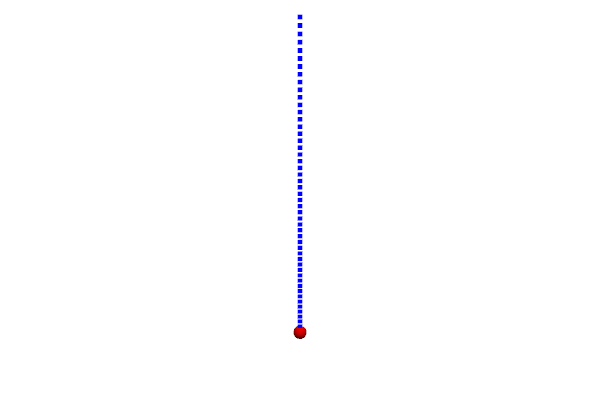

In [2]:

# import libraries
import numpy as np
import pyvista as pv


# Define the origin and direction
O = np.array([0,0,0])
D = np.array([0,0,1])
D = D/np.dot(D,D.T)

# Compute points along the ray for a range of t values
t_values = np.linspace(0, 10, 100)
ray_points = O + np.outer(t_values, D)

# Create a plotter object
plotter = pv.Plotter(notebook=True)

# Add the ray to the plotter
plotter.add_lines(ray_points, color='blue', width=5)

# Add the origin as a red point
plotter.add_mesh(pv.Sphere(center=O, radius=0.2), color='red')

# Display the plot
plotter.show(jupyter_backend='static', window_size=(600,400))


## Exercise 2: Ray-Sphere Intersection

In ray tracing, determining whether a ray intersects a geometric object is fundamental. One of the basic primitives in computer graphics is the sphere. The equation for a sphere in 3D space is:

$ (x - c_x)^2 + (y - c_y)^2 + (z - c_z)^2 = r^2 $

Where $ (c_x, c_y, c_z) $ is the center of the sphere, and $ r $ is its radius.

To find the intersection of a ray and a sphere, we can substitute the ray equation into the sphere equation and solve for $ t $. This will give us the points on the ray where it intersects the sphere.

### Exercise 2: Ray-Sphere Intersection

Your task is to determine if a given ray intersects a sphere in 3D space.

1. Define a sphere with center $ C = (0, 0, 5) $ and radius $ r = 1 $.
2. Use the ray from the previous exercise with origin $\mathbf{O} = (0, 0, 0) $  and direction $ \mathbf{D} = (1, 2, 3) $.
3. Compute the intersection of the ray and the sphere. When there are two intersections, return the first point of intersection.
4. Visualize the ray, the sphere, and the points of intersection (if they exist).


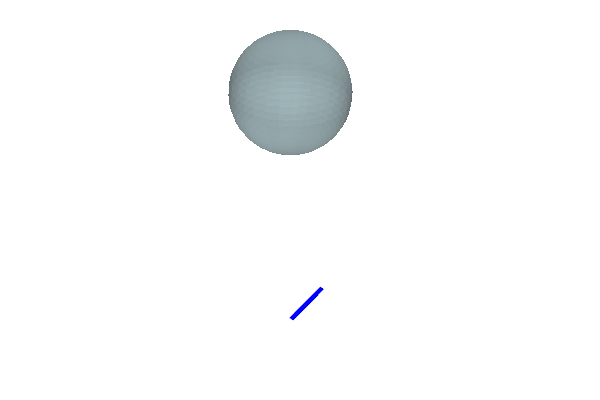

In [25]:
import numpy as np
import pyvista as pv

def ray_sphere_intersection(O, D, C, r):
     # Compare the two points of intersection, and return the point and time of first intersection
    intersects = False
    intersectionTime = 0.0
    intersectionPoint = np.array([0,0,0])
    
    a = np.sum(D**2)
    b = np.dot(D,(C-O).T)*(-2)
    c = np.dot(C-O,(C-O).T)-r**2
    delta = b**2-4*a*c
    if delta<0:
      return intersects, intersectionPoint, intersectionTime
    solve1 = (-b+np.sqrt(delta))/(2*a)
    solve2 = (-b-np.sqrt(delta))/(2*a)
    if solve1>=0 or solve2>=0:
      intersects = True
      if solve1<0:
        t = solve2
      elif solve2<0:
        t = solve1
      else:
        t = min(solve1,solve2)
      intersectionPoint = D*t+O
      intersectionTime = t
    return intersects, intersectionPoint, intersectionTime


# Define the sphere
C = np.array([0,0,5])
r = 1

O = np.array([0,0,0])
D = np.array([1,2,3])
D = D/np.dot(D,D.T)


# Check for intersection
intersects, P, _  = ray_sphere_intersection(O, D, C, r)

# Visualization
plotter = pv.Plotter(notebook=True)
plotter.add_mesh(pv.Sphere(center=C, radius=r), color='lightblue', opacity=0.5)
plotter.add_lines(O + np.outer(np.linspace(0, 10, 100), D), color='blue', width=5)
if intersects:
    plotter.add_mesh(pv.Sphere(center=P, radius=0.1), color='red')
plotter.show(jupyter_backend='static', window_size=(600,400))

### Exercise 3: Ray Generation from an Image Plane

In practical ray tracing, rays are generated from each pixel of an imaginary image plane located in front of the camera. This simulates the process of light entering a camera through each pixel.

Your task is to:

1. Define an imaginary image plane of size `width x height` where `width` and `height` are the number of pixels in the horizontal and vertical directions, respectively.
2. For simplicity, assume the image plane is located 1 unit in front of the camera origin $ \mathbf{O} $ and is perpendicular to the camera's viewing direction.
3. Generate a ray for each pixel on the image plane. The ray's origin is the camera's location, and its direction is from the camera's location through the pixel's location on the image plane.
4. Compute the intersection of each ray with the sphere defined in the previous exercise.
5. Visualize the rays and their intersection points with the sphere.

**Hint**: You might want to use a smaller image plane (e.g., 10x10 pixels) for easier visualization. Also, consider visualizing only a subset of the rays or the intersection points to avoid clutter.


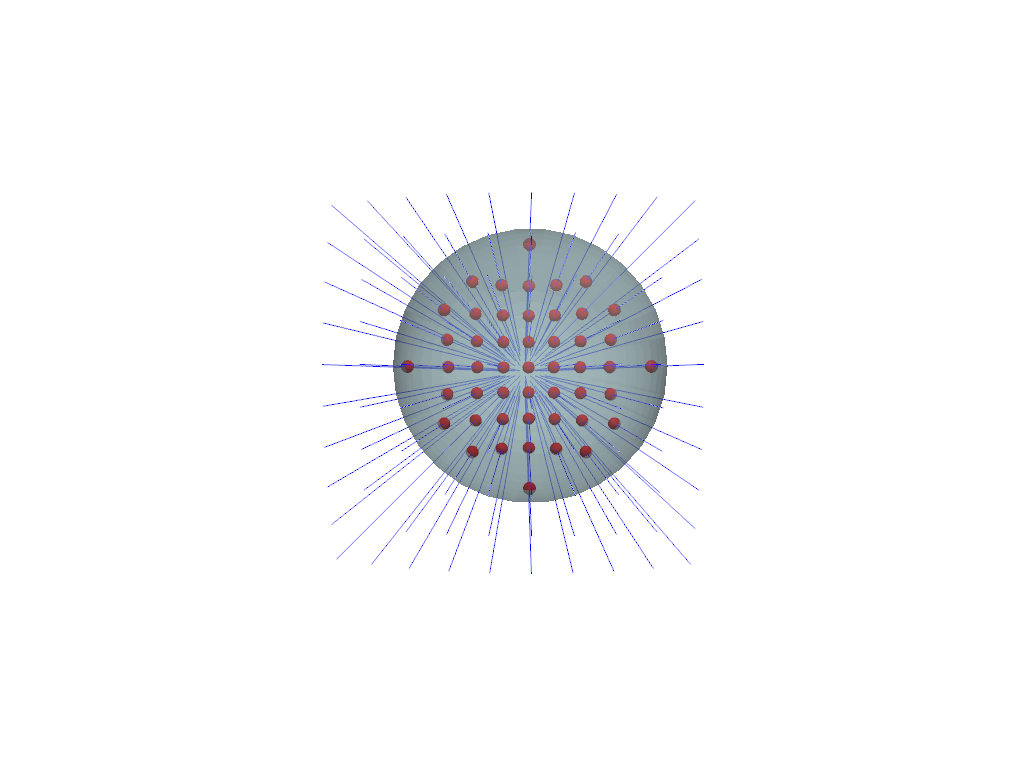

In [4]:
import numpy as np
import pyvista as pv

# Define the camera and image plane properties
O = np.array([0, 0, 0])
width, height = 10, 10
pixel_size = 0.05
image_plane_distance = 1

# Create a plotter object
plotter = pv.Plotter()

# Add the sphere to the plotter
plotter.add_mesh(pv.Sphere(center=C, radius=r), color='lightblue', opacity=0.5)

# Generate rays for each pixel and check for intersection
for i in range(width):
    for j in range(height):
        # Calculate the pixel's position on the image plane
        pixel_pos = O + np.array([(i - width/2.0) * pixel_size, (j - height/2.0) * pixel_size, image_plane_distance])

        # Calculate the ray's direction
        D = pixel_pos - O
        D = D/np.dot(D,D.T)
        # Check for intersection with the sphere
        intersects, P, _ = ray_sphere_intersection(pixel_pos, D, C, r)

        # Visualize the ray and intersection points
        if intersects:
            plotter.add_mesh(pv.Sphere(center=P, radius=0.05), color='red')
        plotter.add_lines(np.array([pixel_pos, pixel_pos + 5*D]), color='blue', width=1)


# Set the camera position
focal_point = C  # Looking at the center of the sphere
up_direction = [0, 1, 0]  # Y-axis is up
plotter.camera_position =  'XY'
# Display the plot
plotter.show(jupyter_backend='static')

## Render a Black and White Image

Building upon the previous exercises, the goal now is to render a black and white image based on the intersection information of rays with the sphere. Each pixel in the image corresponds to a ray. If the ray intersects the sphere, the pixel should be colored white; otherwise, it should be black.

### Exercise 4: Black and White Image Rendering

Your task is to:

1. Create a blank black image of size `width x height`.
2. For each pixel on the image plane, generate a ray.
3. If the ray intersects the sphere, set the corresponding pixel in the image to white.
4. Display the rendered image.

**Hint**: Use a 2D numpy array to represent the image. You can set values to `1` (white) for intersections and `0` (black) for no intersections. Use `matplotlib` to display the final image.


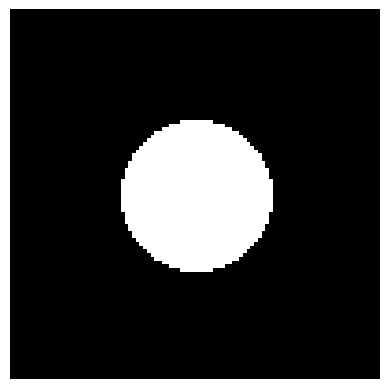

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the camera and image plane properties
width, height = 100, 100
pixel_size = 0.01
image_plane_distance = 1

# Define the sphere
C = np.array([0, 0, 5])
r = 1

# Create a blank black image
image = np.zeros((height, width))

# Generate rays for each pixel and check for intersection
for i in range(width):
    for j in range(height):
        # Calculate the pixel's position on the image plane
        pixel_pos = O + np.array([(i - width/2) * pixel_size, (j - height/2) * pixel_size, image_plane_distance])
        
        # Calculate the ray's direction
        D = pixel_pos - O
        D = D/np.dot(D,D.T)
        
        # Check for intersection with the sphere
        intersects, _, _ = ray_sphere_intersection(pixel_pos, D, C, r)
        
        # If there's an intersection, set the pixel to white
        if intersects:
            image[j, i] = 1

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()


## Render an Image with Normal-based Coloring

Building upon the previous exercises, the goal now is to render an image where the color of each pixel is determined by the normal vector at the intersection point with the sphere. The normal vector provides information about the orientation of the surface at the intersection point. By using the components of the normal vector as RGB values, we can generate a color for each intersection point. The color should be generated using the N dot L lighting model. The $ N \cdot L $ model is a simple way to simulate the effect of a light source on a surface. In this model, \( N \) is the normal vector at the intersection point, and $ L $ is the direction vector pointing towards the light source.


### Exercise 5: Normal-based Image Rendering

Your task is to:

1. Modify the intersection function to also return the normal vector at the intersection point.
2. Create a blank image of size `width x height`.
3. For each pixel on the image plane, generate a ray.
4. If the ray intersects the sphere, compute the normal vector at the intersection point.
5. Use the components of the normal vector to determine the RGB values for the corresponding pixel in the image. The RGB value should be determined using the N dot L lighting model, where
  the direction vector L points from the intersection point to the light source. Calculate the dot product $ N dot L$ to determine the intensity of the light at that point.
  Use the intensity value to set the grayscale value for the corresponding pixel in the image. 
6. Display the rendered image.

**Hint**: The normal vector at any point $ P $ on the sphere is given by $ \mathbf{N} = \frac{P - C}{r} $, where $ C $ is the center of the sphere and $ r $ is its radius. Normalize the components of the normal vector to the range [0, 1] to obtain RGB values.

**Hint**: Normalize both $ N $ and $ L $ before computing the dot product. The dot product will give a value between -1 and 1. Clamp this value to the range [0, 1] to obtain a valid intensity.


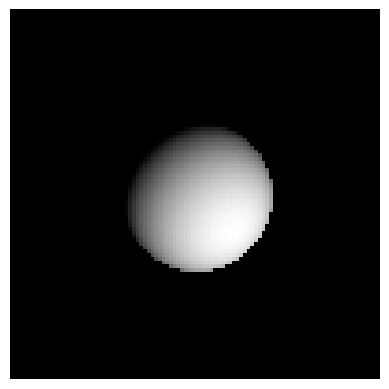

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def ray_sphere_intersection_with_normal(O, D, C, r):

    intersects, P, t = ray_sphere_intersection(O, D, C, r)
    # Compute the normal at the intersection points 
    N = np.zeros([0,0,0])
    if intersects:
        N = P-C
        N = N/np.linalg.norm(N)
    return  intersects, P, t, N

# ... [rest of the setup code] ...

# Create a blank RGB image
image = np.zeros((height, width, 3))

# Define a light source position
light_pos = np.array([5, 5, -5])

# Generate rays for each pixel and check for intersection
for i in range(width):
    for j in range(height):
        # ... [ray generation code] ...
        # Calculate the pixel's position on the image plane
        pixel_pos = O + np.array([(i - width/2) * pixel_size, (j - height/2) * pixel_size, image_plane_distance])
        
        # Calculate the ray's direction
        D = pixel_pos - O
        D = D/np.dot(D,D.T)
        
        # Check for intersection with the sphere
        intersects, P, t, N = ray_sphere_intersection_with_normal(pixel_pos, D, C, r)
        
        # If there's an intersection, set the pixel color based on the normal
        if intersects:
            L = light_pos - P
            L = L / np.linalg.norm(L)  # Normalize L
            intensity = np.dot(N, L)
            intensity = np.clip(intensity, 0, 1)  # Clamp to [0, 1]
            image[j, i] = intensity

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


## Advanced Exercises
1. Augment the scene with three spheres positioned at different locations, each with a different color. Render a colored image of the scene
2. Create a scene with a single triangle, render a black and white image of the triangle
3. Create a scene with multiple triangles and sphere, each specified with a different color, render a colored image of the scene


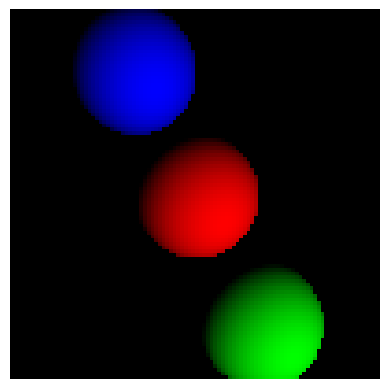

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def ray_sphere_intersection_with_normal(O, D, C, r):

    intersects, P, t = ray_sphere_intersection(O, D, C, r)
    # Compute the normal at the intersection points 
    N = np.zeros([0,0,0])
    if intersects:
        N = P-C
        N = N/np.linalg.norm(N)
    return  intersects, P, t, N

# ... [rest of the setup code] ...

# Create a blank RGB image
image = np.zeros((height, width, 3))

# Define a light source position
light_pos = np.array([5, 5, -5])

# Generate rays for each pixel and check for intersection, generate a red block
def func(O, C, r, color):
    for i in range(width):
        for j in range(height):
            # ... [ray generation code] ...
            # Calculate the pixel's position on the image plane
            pixel_pos = O + np.array([(i - width/2) * pixel_size, (j - height/2) * pixel_size, image_plane_distance])
            
            # Calculate the ray's direction
            D = pixel_pos - O
            D = D/np.dot(D,D.T)
            
            # Check for intersection with the sphere
            intersects, P, t, N = ray_sphere_intersection_with_normal(pixel_pos, D, C, r)
            
            # If there's an intersection, set the pixel color based on the normal
            if intersects:
                L = light_pos - P
                L = L / np.linalg.norm(L)  # Normalize L
                intensity = np.dot(N, L)
                intensity = np.clip(intensity, 0, 1)  # Clamp to [0, 1]
                image[j, i, color] = intensity

C = np.array([0,0,6])
r = 1
func(O, C, r, 0)
C = np.array([1,2,6])
r = 1
func(O, C, r, 1)
C = np.array([-1,-2,6])
r = 1
func(O, C, r, 2)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

plane's qeuation

$ (x-x_0)/a +(y-y_0)/b + (z-z_0)/c = 0$

(a,b,c) means the vactor perpandicular to the plane

(a,b,c) = one side of the triangle cross product to another side of the triangle

$ (x,y,z) = O+t*D $

$ t*(D[0]/a+D[1]/b+D[2]/c)+(O-x_0)/a+(O-y_0)/b+(O-z_0)/c = 0 $

In [ ]:
# define 
def ray_triangle_intersection(O, D, triangle_3_points):
     # Compare the two points of intersection, and return the point and time of first intersection
     intersects = False
     intersectionTime = 0.0
     intersectionPoint = np.array([0,0,0])
     
     side1 = triangle_3_points[0] - triangle_3_points[1]
     side2 = triangle_3_points[1] - triangle_3_points[2]
     side3 = triangle_3_points[0] - triangle_3_points[2]
     # triangle's equation in space
     vac = np.cross(side1,side2)
     
     # solve the equation, find out the interaction that the ray go through the plane
     # O+t*D plug in the eq
     t = np.sum(-(O-triangle_3_points[0])/vac)/np.sum(D/vac)
     P = O+t*D
     # if the point is in the triangle
     x0P = triangle_3_points[0] - P
     # s1_x*miu + s2_x*v = x0P_x
     # s1_y*miu + s2_y*v = x0P_y
     # solve miu v
     # consider miu v is in the interval [0,1] or not
     # if it is, the point is in the triangle
     # if not, the point is not in the triangle
     s1_x = side1[0]
     s1_y = side1[1]
     s2_x = side2[0]
     s2_y = side2[1]
     x0P_x = x0P[0]
     x0P_y = x0P[1]
     A = np.array([[s1_x,s2_x],[s1_y,s2_y]])
     b = np.array([x0P_x,x0P_y])
     miu_v = np.linalg.solve(A,b)
     if miu_v[0]>=0 and miu_v[0]<=1 and miu_v[1]>=0 and miu_v[1]<=1:
       intersects = True
       intersectionPoint = P
       intersectionTime = t
     return intersects, intersectionPoint, intersectionTime